In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\91812\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
tickers = ['BAJAJELEC', 'AMARAJABAT', 'HDFC', 'UTIQUE']
mydata = pd.DataFrame()
# for t in tickers:
#     mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']
mydata["BEL"] = wb.DataReader("HDFC", data_source='yahoo', start='1995-1-1')['Adj Close']

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/HDFC/history?period1=788913000&period2=1627252199&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6421 entries, 1995-01-03 to 2020-07-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6421 non-null   float64
 1   MSFT    6421 non-null   float64
 2   F       6421 non-null   float64
 3   GE      6421 non-null   float64
dtypes: float64(4)
memory usage: 250.8 KB


In [5]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,3.262354,2.725145
1995-01-04,6.269589,2.424330,3.350130,2.725145
1995-01-05,6.180927,2.384342,3.320871,2.731823
1995-01-06,6.193593,2.424330,3.320871,2.718464
1995-01-09,6.168259,2.409335,3.379390,2.691748


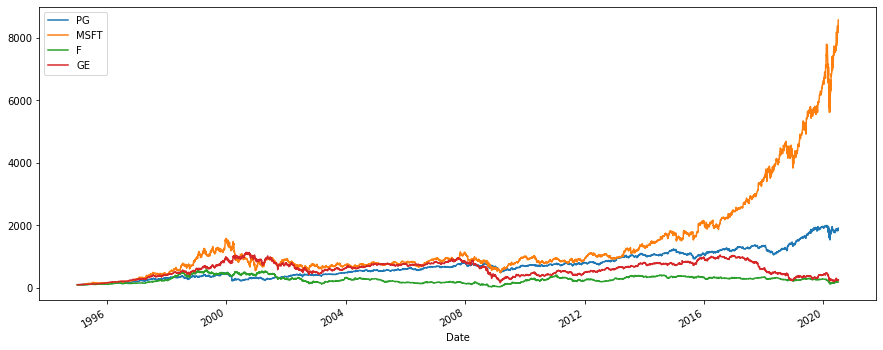

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

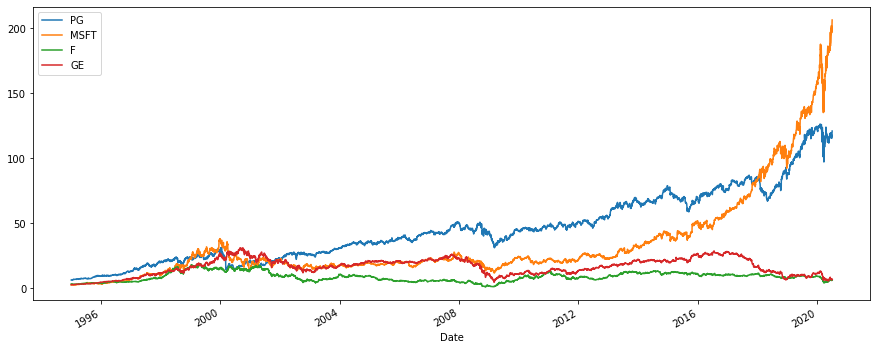

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [10]:
mydata.loc['1995-01-03']

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
np.dot(returns, weights)

array([        nan,  0.00653977, -0.00922981, ...,  0.01446034,
       -0.00508704,  0.00967433])

In [14]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.140886
MSFT    0.223399
F       0.104080
GE      0.086397
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.13869052166925974

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.869000000000002 %


In [17]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.869000000000002 %
16.564999999999998 %


In [8]:
symbol = "ABB"
df = wb.DataReader(symbol, 'quandl', '2015-01-01', '2015-01-05')

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.